# 3D Basis
Define some basis vectors for a 3D space - and show that they are complete (i.e., resolve the identity)

## Define Basis

In [1]:
x = [1.0, 0.0, 0.0]
y = [0.0, 1.0, 0.0]
z = [0.0, 0.0, 1.0]

3-element Array{Float64,1}:
 0.0
 0.0
 1.0

In [2]:
x*x' + y*y' + z*z'

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

## Create random vector in this basis

In [3]:
# all numbers will be positive - meaning it will be in positive quadrant
v = rand(3)

3-element Array{Float64,1}:
 0.061761822965954005
 0.46272622760254256
 0.6347331438905186

Show that the projectors do what we expect:

In [4]:
x * x' * v

3-element Array{Float64,1}:
 0.061761822965954005
 0.0
 0.0

In [5]:
y * y' * v

3-element Array{Float64,1}:
 0.0
 0.46272622760254256
 0.0

In [6]:
z * z' * v

3-element Array{Float64,1}:
 0.0
 0.0
 0.6347331438905186

## Define a new random orthonormal basis

start with 3 random vectors

In [7]:
u1 = rand(3) .- .5
u2 = rand(3) .- .5
u3 = rand(3) .- .5;

these are not orthonormal!

In [8]:
u1'*u1

0.3975267222975799

In [9]:
u1'*u2

-0.3262225383963841

First let's orthogonalize them using a method called Gram-Schmidt [read more](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process).

In [10]:
# project out u1 from u2
u2 = u2 - u1*u1'*u2 / (u1'*u1)

# project out u2 and u1 from u3
u3 = u3 - u1*u1'*u3 / (u1'*u1)
u3 = u3 - u2*u2'*u3 / (u2'*u2);

In [11]:
# see that they are orthogonal now:
println(u1'*u2)
println(u1'*u3)
println(u2'*u3)

-6.938893903907228e-18
6.938893903907228e-18
1.734723475976807e-18


Now normalize each vector

In [12]:
u1 = u1 / sqrt(u1'*u1)
u2 = u2 / sqrt(u2'*u2)
u3 = u3 / sqrt(u3'*u3);

In [13]:
println(u1'*u1)
println(u2'*u2)
println(u3'*u3)

1.0
1.0
1.0


Our basis looks completely different from the original x, y, z basis

In [14]:
# Create matrix where the columns are the basis vectors
basis1 = hcat(x, y, z) 
basis2 = hcat(u1, u2, u3);

display(basis1)
display(basis2)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Array{Float64,2}:
  0.119627  -0.965214    0.23249
 -0.705421  -0.247415   -0.664204
  0.698621  -0.0845465  -0.710479

however, both are orthonormal

In [15]:
display(basis1'*basis1)
display(basis2'*basis2)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Array{Float64,2}:
  1.0          -4.16334e-17   5.55112e-17
 -4.16334e-17   1.0          -1.38778e-17
  5.55112e-17  -1.38778e-17   1.0

## Now rotate our vector to this new random orthonormal basis

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

Remember that in order to perform a change of basis, we need to find the overlap matrix 
$$
b_{i} = \sum_j S_{ij} c_{j}
$$
where 
$$ \require{physics} S_{ij} = \braket{w_i}{u_j} $$

In [16]:
# Define overlap matrix
S = basis2'*basis1

display(S)

# this matrix is orthogonal
display(S'*S)
display(S*S')

3×3 Array{Float64,2}:
  0.119627  -0.705421   0.698621
 -0.965214  -0.247415  -0.0845465
  0.23249   -0.664204  -0.710479

3×3 Array{Float64,2}:
  1.0          -5.55112e-17  2.77556e-17
 -5.55112e-17   1.0          0.0
  2.77556e-17   0.0          1.0

3×3 Array{Float64,2}:
  1.0          -4.16334e-17   5.55112e-17
 -4.16334e-17   1.0          -1.38778e-17
  5.55112e-17  -1.38778e-17   1.0

In [17]:
# now convert our vector from basis1 to basis2
v2 = S*v

3-element Array{Float64,1}:
  0.12440969902666249
 -0.2277633955850989
 -0.7439504760803239

Here, we can show that the two vectors look different _if_ plotted in the same coordinate system

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1278


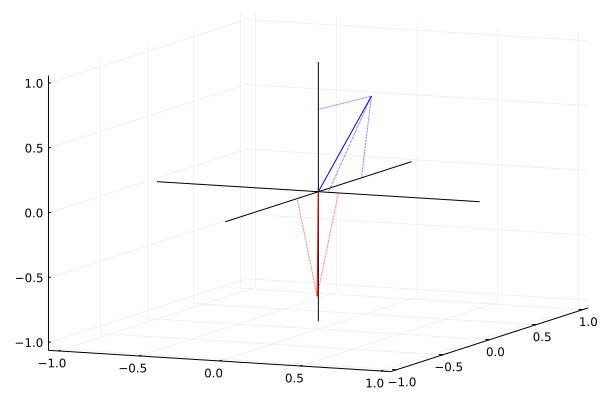

In [18]:
using Plots


plot3d([0], [0], [0], color="black")
plot3d!([-1,1], [0,0], [0,0], color="black")
plot3d!([0,0], [-1,1], [0,0], color="black")
plot3d!([0,0], [0,0], [-1,1], color="black")

plot3d!([0,v[1]], [0,v[2]], [0,v[3]], color="blue")
plot3d!([0,v2[1]], [0,v2[2]], [0,v2[3]], color="red")

points1 = hcat(zeros(3),v)
points2 = hcat(zeros(3),v2)

plot3d!([v2[1],v2[1]], [0,v2[2]], [0,v2[3]], color="red", linestyle=:dot)
plot3d!([0,v2[1]], [v2[2],v2[2]], [0,v2[3]], color="red", linestyle=:dot)
plot3d!([0,v2[1]], [0,v2[2]], [v2[3],v2[3]], color="red", linestyle=:dot)


plot3d!([v[1],v[1]], [0,v[2]], [0,v[3]], color="blue", linestyle=:dot)
plot3d!([0,v[1]], [v[2],v[2]], [0,v[3]], color="blue", linestyle=:dot)
plot3d!([0,v[1]], [0,v[2]], [v[3],v[3]], color="blue", linestyle=:dot, legend=false)

# plot3d!([0,v2[1]], [0,v2[2]], [0,0], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [0,0], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,0], [0,v2[2]], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [v2[2],v2[2]], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [0,v2[2]], [v2[3],v2[3]], color="red", linestyle=:dot)
